In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
gpt_4o_results = pd.read_csv("./results/results_chatgpt_gpt-4o-2024-05-13.csv")
gpt_4o_mini_results = pd.read_csv("./results/results_chatgpt_gpt-4o-mini-2024-07-18.csv")
gpt_4_turbo_results = pd.read_csv("./results/results_chatgpt_gpt-4-turbo-2024-04-09.csv")

claude_3_5_sonnet_results = pd.read_csv("./results/results_claude_claude-3-5-sonnet-20240620.csv")
claude_3_haiku_results = pd.read_csv("./results/results_claude_claude-3-haiku-20240307.csv")

gemini_1_5_flash_results = pd.read_csv("./results/results_google_gemini-1.5-flash-001.csv")

llama_3_1_8b_results = pd.read_csv("./results/results_llama_llama-3.1-8b-instant.csv")

In [3]:
# Model costs, normalized by 3:1 tokens
model_costs = {
    "GPT-4o": 7.5,
    "Claude 3.5 Sonnet": 6,
    "Claude 3 Haiku": 0.5,
    "GPT-4o Mini": 0.3,
    "GPT-4 Turbo": 15,
    "Gemini 1.5 Flash": 0.5,
    "Llama 3.1 8B": 0.2,
}

# Define the mapping of subjects to categories
general_categories = {
    "turkish_grammar": "turkish",
    "turkish_semantics": "turkish",
    "turkish_geography": "culture",
    "turkish_literature": "culture",
    "turkish_culture": "culture",
    "turkish_history": "culture",
    "turkish_cuisine": "culture",
    "numeric_reasoning": "math",
    "mathematics": "math",
    "hard_geometry": "math",
    "hard_mathematics": "math",
    "physics": "sciences",
    "biology": "sciences",
    "chemistry": "sciences",
    "turkish_law": "sciences",
    "philosophy": "sciences",
    "turkish_politics": "sciences",
}

In [4]:
def plot_accuracy(df, model_name):
    accuracy = df['correct'].mean()
    return pd.DataFrame({'Model': [model_name], 'Accuracy': [accuracy]})

def calculate_accuracy(df):
    accuracy = df['correct'].sum() / len(df)

    return accuracy

def calculate_accuracy_per_subject(df, model_name):
    subject_accuracy = df.groupby('Subject')['correct'].mean().reset_index()
    subject_accuracy['Model'] = model_name
    return subject_accuracy


In [5]:
# Calculate accuracies for all models

model_results = {
    'GPT-4o': gpt_4o_results,
    'GPT-4o Mini': gpt_4o_mini_results,
    'GPT-4 Turbo': gpt_4_turbo_results,
    'Claude 3.5 Sonnet': claude_3_5_sonnet_results,
    'Claude 3 Haiku': claude_3_haiku_results,
    'Gemini 1.5 Flash': gemini_1_5_flash_results,
    'Llama 3.1 8B': llama_3_1_8b_results
}

gpt_4o_accuracy = calculate_accuracy(gpt_4o_results)
gpt_4o_mini_accuracy = calculate_accuracy(gpt_4o_mini_results)
gpt_4_turbo_accuracy = calculate_accuracy(gpt_4_turbo_results)
claude_3_5_sonnet_accuracy = calculate_accuracy(claude_3_5_sonnet_results)
claude_3_haiku_accuracy = calculate_accuracy(claude_3_haiku_results)
gemini_1_5_flash_accuracy = calculate_accuracy(gemini_1_5_flash_results)
llama_3_1_8b_accuracy = calculate_accuracy(llama_3_1_8b_results)

accuracy_gpt_4o = plot_accuracy(gpt_4o_results, 'GPT-4o')
accuracy_gpt_4o_mini = plot_accuracy(gpt_4o_mini_results, 'GPT-4o Mini')
accuracy_gpt_4_turbo = plot_accuracy(gpt_4_turbo_results, 'GPT-4 Turbo')
accuracy_claude_3_5_sonnet = plot_accuracy(claude_3_5_sonnet_results, 'Claude 3.5 Sonnet')
accuracy_claude_3_haiku = plot_accuracy(claude_3_haiku_results, 'Claude 3 Haiku')
accuracy_gemini_1_5_flash = plot_accuracy(gemini_1_5_flash_results, 'Gemini 1.5 Flash')
accuracy_llama_3_1_8b = plot_accuracy(llama_3_1_8b_results, 'Llama 3.1 8B')

accuracy_subject_chatgpt_gpt_4o = calculate_accuracy_per_subject(gpt_4o_results, 'GPT-4o')
accuracy_subject_chatgpt_gpt_4o_mini = calculate_accuracy_per_subject(gpt_4o_mini_results, 'GPT-4o Mini')
accuracy_subject_chatgpt_gpt_4_turbo = calculate_accuracy_per_subject(gpt_4_turbo_results, 'GPT-4 Turbo')
accuracy_subject_claude_3_5_sonnet = calculate_accuracy_per_subject(claude_3_5_sonnet_results, 'Claude 3.5 Sonnet')
accuracy_subject_claude_3_haiku = calculate_accuracy_per_subject(claude_3_haiku_results, 'Claude 3 Haiku')
accuracy_subject_gemini_1_5 = calculate_accuracy_per_subject(gemini_1_5_flash_results, 'Gemini 1.5 Flash')
accuracy_subject_llama_3_1_8b = calculate_accuracy_per_subject(llama_3_1_8b_results, 'Llama 3.1 8B')

C:\Users\Plyra\AppData\Local\Temp\ipykernel_5900\3877426094.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accuracy_df, x='Model', y='Accuracy', palette='viridis', ax=ax)


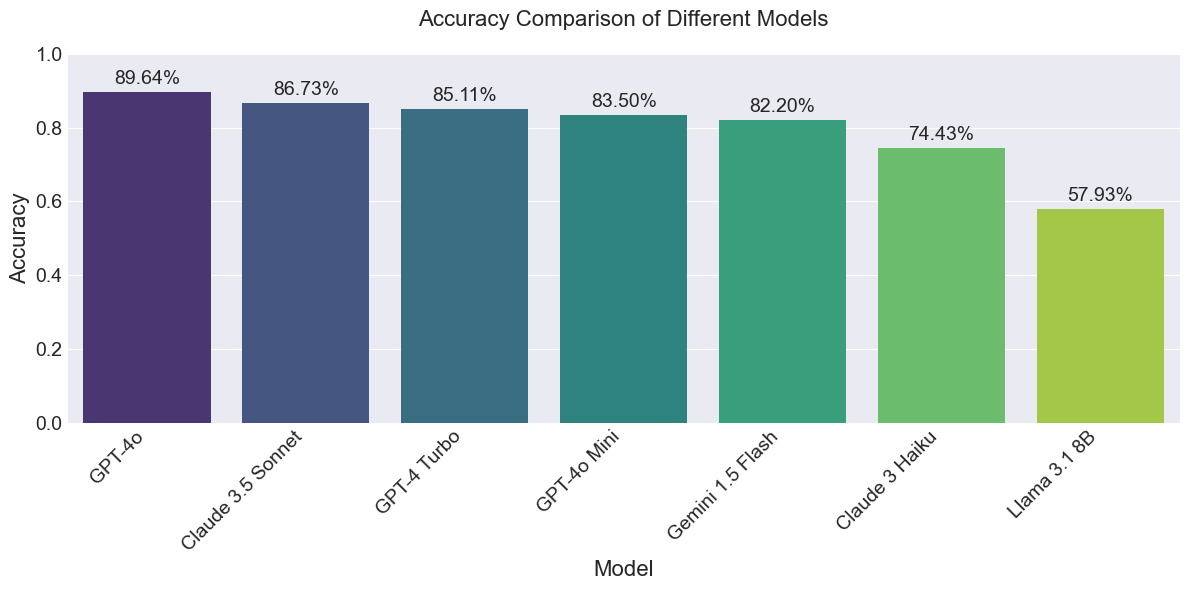

In [6]:
# Calculate accuracies
accuracy_df = pd.concat([plot_accuracy(df, name) for name, df in model_results.items()])

# Sort the DataFrame by accuracy in descending order
accuracy_df = accuracy_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

# Set up the plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=accuracy_df, x='Model', y='Accuracy', palette='viridis', ax=ax)

# Customize the plot
ax.set_title('Accuracy Comparison of Different Models', fontsize=16, pad=20)
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_xlabel('Model', fontsize=16)
ax.set_ylim(0, 1)

# Add value labels on top of each bar
for i, v in enumerate(accuracy_df['Accuracy']):
    ax.text(i, v + 0.01, f'{v:.2%}', ha='center', va='bottom', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)

ax.tick_params(axis='y', labelsize=14)

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('accuracy_all_1.png', dpi=300, bbox_inches='tight')
plt.show()

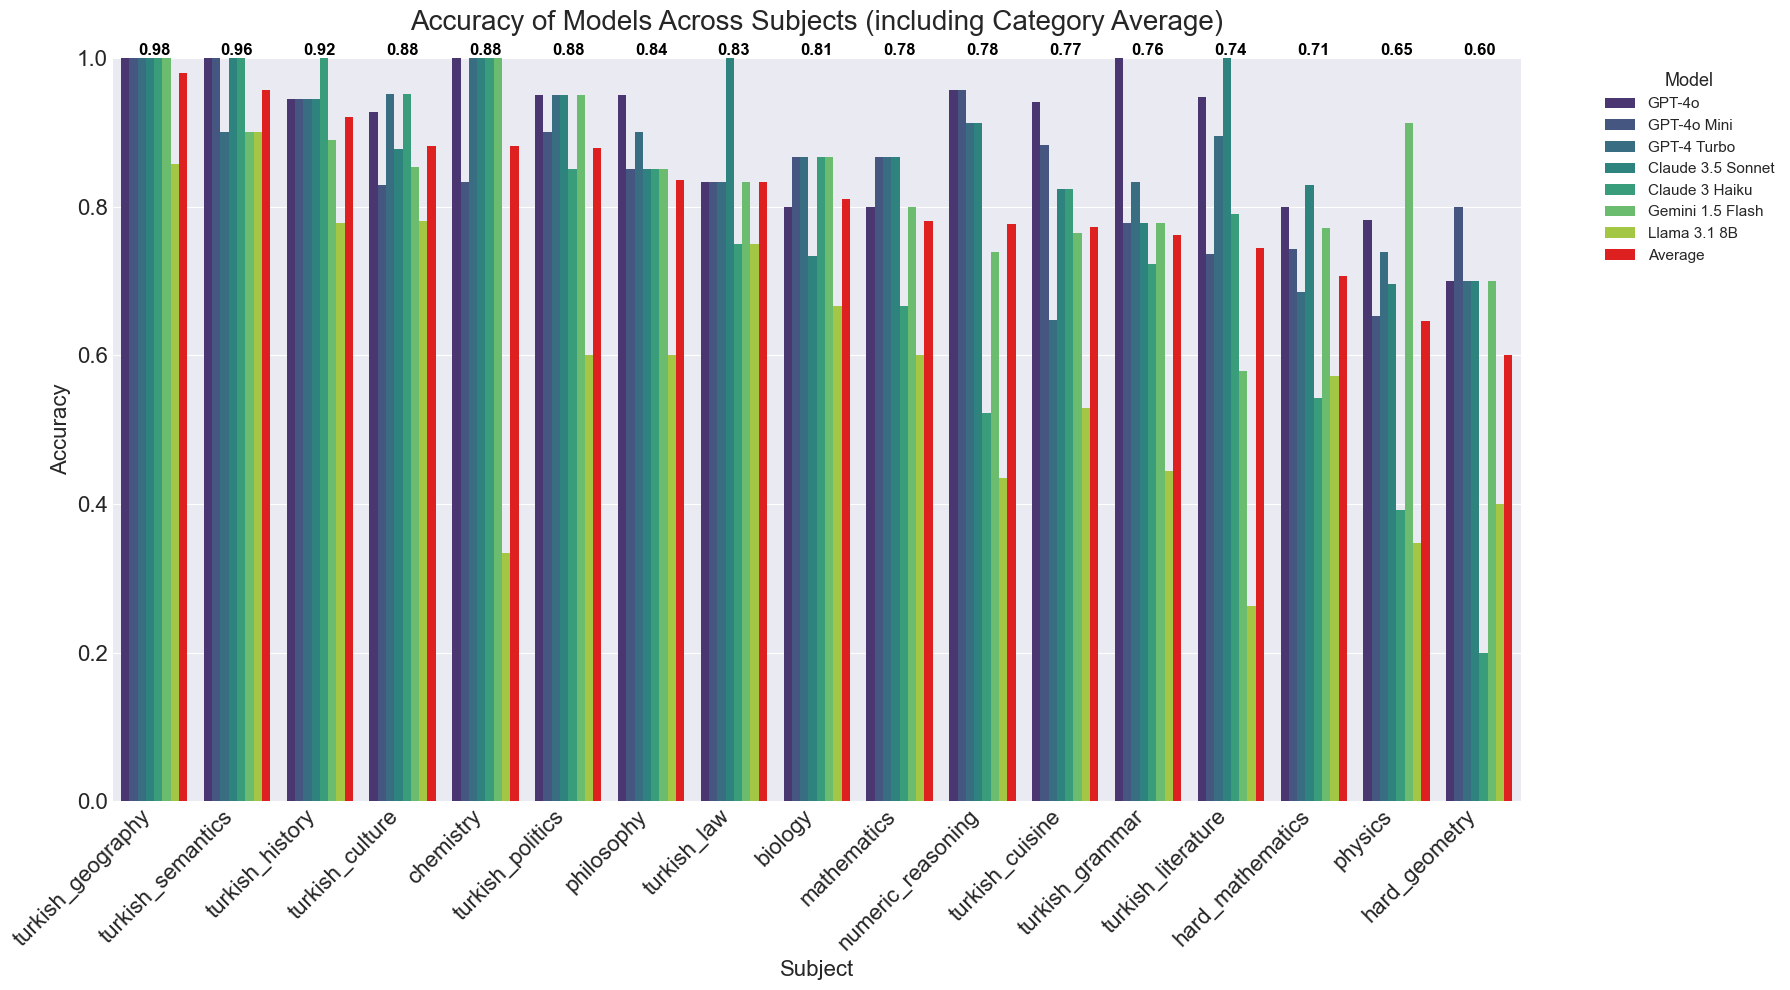

In [7]:
# Calculate accuracies for all models
accuracy_subject_df = pd.concat([calculate_accuracy_per_subject(df, name) for name, df in model_results.items()])

# Calculate average accuracy for each subject across all models
avg_subject_accuracy = accuracy_subject_df.groupby('Subject')['correct'].mean().reset_index()
avg_subject_accuracy['Model'] = 'Average'

# Combine model-specific and average accuracies
combined_df = pd.concat([accuracy_subject_df, avg_subject_accuracy])

# Sort subjects by average accuracy
subject_order = avg_subject_accuracy.sort_values('correct', ascending=False)['Subject']

# Set up the plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(18, 10))

# Create a custom palette with 'Average' in red
model_names = accuracy_subject_df['Model'].unique().tolist() + ['Average']
colors = sns.color_palette('viridis', len(model_names) - 1).as_hex() + ['#FF0000']  # Red for 'Average'
color_palette = dict(zip(model_names, colors))

# Create the grouped bar plot
sns.barplot(data=combined_df, x='Subject', y='correct', hue='Model', palette=color_palette, ax=ax, order=subject_order)

# Customize the plot
ax.set_title('Accuracy of Models Across Subjects (including Category Average)', fontsize=20, pad=20)
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_xlabel('Subject', fontsize=16)
ax.set_ylim(0, 1)

# Rotate x-axis labels and adjust their alignment
plt.xticks(rotation=45, ha='right',fontsize=16)

# Set y-axis tick labels to fontsize 14
ax.tick_params(axis='y', labelsize=16)

# Adjust legend
plt.legend(title='Model', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value labels only for the average bars
for i, subject in enumerate(subject_order):
    avg_value = avg_subject_accuracy[avg_subject_accuracy['Subject'] == subject]['correct'].values[0]
    ax.text(i, 1.0, f'{avg_value:.2f}', ha='center', va='bottom', fontweight='bold', color='black', fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('accuracy_all_subjects_2.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\Plyra\AppData\Local\Temp\ipykernel_5900\3796935553.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha='right', fontsize=14)
C:\Users\Plyra\AppData\Local\Temp\ipykernel_5900\3796935553.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_yticklabels(bar_plot.get_yticklabels(), fontsize=14)


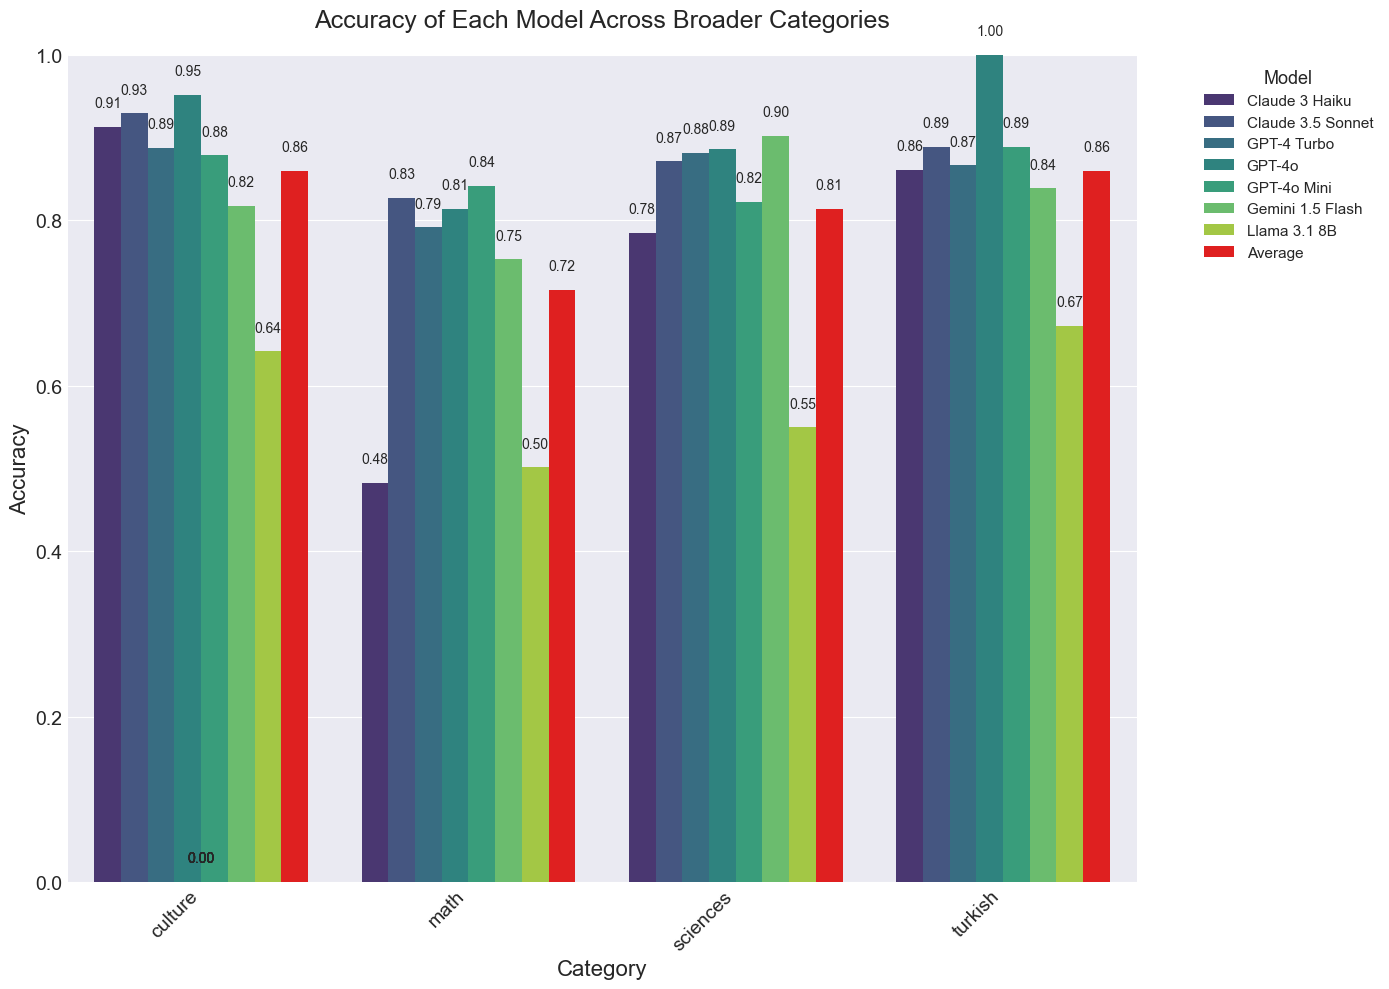

In [8]:
accuracy_subject_df['Category'] = accuracy_subject_df['Subject'].map(general_categories)
accuracy_category_df = accuracy_subject_df.groupby(['Model', 'Category'])['correct'].mean().reset_index()

# Calculate average accuracy per category
avg_accuracy_df = accuracy_category_df.groupby('Category')['correct'].mean().reset_index()
avg_accuracy_df['Model'] = 'Average'

# Combine with the main data frame
combined_df = pd.concat([accuracy_category_df, avg_accuracy_df])

plt.figure(figsize=(14, 10))

# Set up a custom color palette, adding red for 'Average'
model_names = combined_df['Model'].unique().tolist()
colors = sns.color_palette('viridis', len(model_names) - 1).as_hex() + ['#FF0000']
color_palette = dict(zip(model_names, colors))
sns.set_palette(colors)

# Create the barplot with value labels
bar_plot = sns.barplot(data=combined_df, x="Category", y="correct", hue="Model", palette=color_palette)
bar_plot.set_title("Accuracy of Each Model Across Broader Categories", fontsize=18, pad=20)
bar_plot.set_ylim(0, 1)
bar_plot.set_ylabel("Accuracy", fontsize=16)
bar_plot.set_xlabel("Category", fontsize=16)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha='right', fontsize=14)
bar_plot.set_yticklabels(bar_plot.get_yticklabels(), fontsize=14)
plt.legend(title="Model", title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value labels above each bar
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.02,
        f'{height:.2f}',
        ha="center", va='bottom', fontsize=10
    )

plt.tight_layout()
plt.savefig('accuracy_all_categories_3.png', dpi=300, bbox_inches='tight')
plt.show()

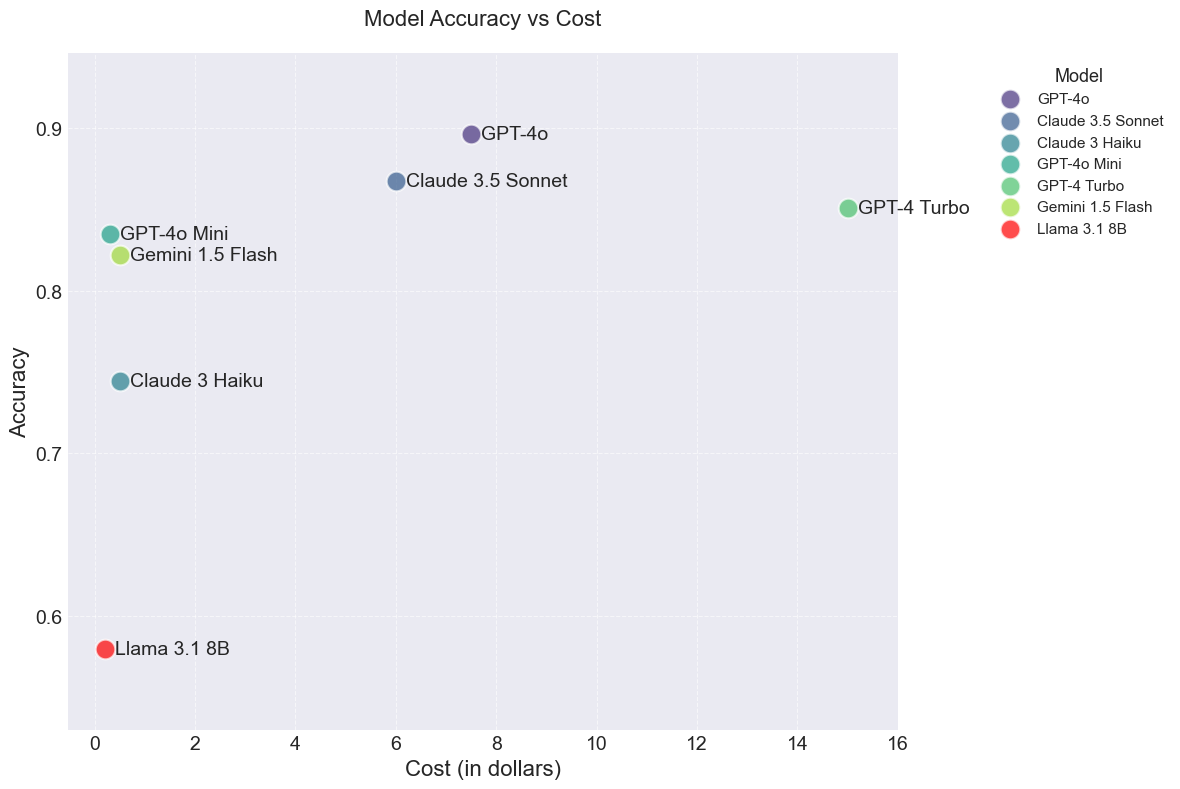

In [9]:
# Prepare the data
accuracy_cost_data = {
    "Model": ["GPT-4o", "Claude 3.5 Sonnet", "Claude 3 Haiku", "GPT-4o Mini", "GPT-4 Turbo", "Gemini 1.5 Flash", "Llama 3.1 8B"],
    "Accuracy": [
        gpt_4o_accuracy,
        claude_3_5_sonnet_accuracy,
        claude_3_haiku_accuracy,
        gpt_4o_mini_accuracy,
        gpt_4_turbo_accuracy,
        gemini_1_5_flash_accuracy,
        llama_3_1_8b_accuracy
    ],
    "Cost": [model_costs[model] for model in ["GPT-4o", "Claude 3.5 Sonnet", "Claude 3 Haiku", "GPT-4o Mini", "GPT-4 Turbo", "Gemini 1.5 Flash", "Llama 3.1 8B"]]
}

accuracy_cost_df = pd.DataFrame(accuracy_cost_data)

# Define the color palette
colors = sns.color_palette('viridis', len(accuracy_cost_df) - 1).as_hex() + ['#FF0000']
model_colors = dict(zip(accuracy_cost_df['Model'], colors))

# Calculate y-axis limits
min_accuracy = accuracy_cost_df['Accuracy'].min()
max_accuracy = accuracy_cost_df['Accuracy'].max()
y_min = max(0, min_accuracy - 0.05)  # Ensure minimum does not go below 0
y_max = min(1, max_accuracy + 0.05)  # Ensure maximum does not go above 1

# Plotting the accuracy-cost chart
plt.figure(figsize=(12, 8))

# Plot each point with the specified color and add labels for the legend
for model, row in accuracy_cost_df.iterrows():
    plt.scatter(row['Cost'], row['Accuracy'], color=model_colors[row['Model']], s=200, alpha=0.7, edgecolors='w', linewidth=1.5, label=row['Model'])

# Annotate each model with its name
for i, row in accuracy_cost_df.iterrows():
    plt.text(row['Cost'] + 0.2, row['Accuracy'], row['Model'], fontsize=14, va='center')

plt.title('Model Accuracy vs Cost', fontsize=16, pad=20)
plt.xlabel('Cost (in dollars)', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, int(max(accuracy_cost_df['Cost'])) + 2, 2),fontsize=14)
plt.yticks([i/10 for i in range(0, 11)], fontsize=14)

# Set y-axis limits
plt.ylim(y_min, y_max)

# Add legend
plt.legend(title="Model", title_fontsize='13', fontsize='11', bbox_to_anchor=(1.1, 1), loc='upper left')

plt.tight_layout()
plt.savefig('accuracy_vs_cost_4.png', dpi=300, bbox_inches='tight')
plt.show()

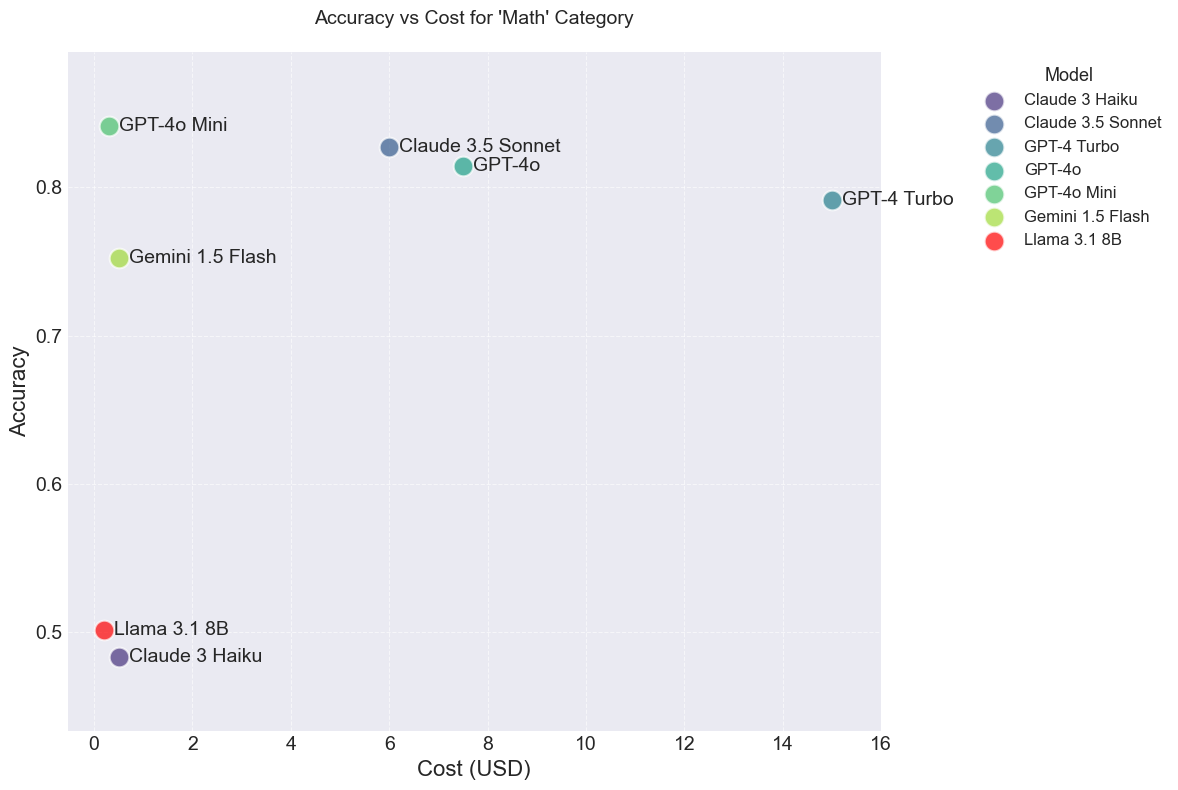

In [10]:
accuracy_category_df['Cost'] = accuracy_category_df['Model'].map(model_costs)
# Filter the data for the 'math' category
accuracy_category_df_math = accuracy_category_df[accuracy_category_df['Category'] == 'math']

# Define the color palette
colors = sns.color_palette('viridis', len(accuracy_category_df_math['Model'].unique()) - 1).as_hex() + ['#FF0000']
model_colors = dict(zip(accuracy_category_df_math['Model'].unique(), colors))

# Calculate y-axis limits
min_accuracy = accuracy_category_df_math['correct'].min()
max_accuracy = accuracy_category_df_math['correct'].max()
y_min = max(0, min_accuracy - 0.05)  # Ensure minimum does not go below 0
y_max = min(1, max_accuracy + 0.05)  # Ensure maximum does not go above 1

# Plotting the accuracy-cost chart for the 'math' category
plt.figure(figsize=(12, 8))

# Plot each point with the specified color and add labels for the legend
for model, row in accuracy_category_df_math.iterrows():
    plt.scatter(row['Cost'], row['correct'], color=model_colors[row['Model']], s=200, alpha=0.7, edgecolors='w', linewidth=1.5, label=row['Model'])

# Annotate each model with its name
for i, row in accuracy_category_df_math.iterrows():
    plt.text(row['Cost'] + 0.2, row['correct'], row['Model'], fontsize=14, va='center')

plt.title("Accuracy vs Cost for 'Math' Category", fontsize=14, pad=20)
plt.xlabel('Cost (USD)', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, int(max(accuracy_category_df_math['Cost'])) + 2, 2), fontsize=14)
plt.yticks([i/10 for i in range(0, 11)], fontsize=14)

# Set y-axis limits
plt.ylim(y_min, y_max)

# Add legend
plt.legend(title="Model", title_fontsize='13', fontsize='12', bbox_to_anchor=(1.1, 1), loc='upper left')

plt.tight_layout()
plt.savefig('accuracy_vs_cost_math_5.png', dpi=300, bbox_inches='tight')
plt.show()

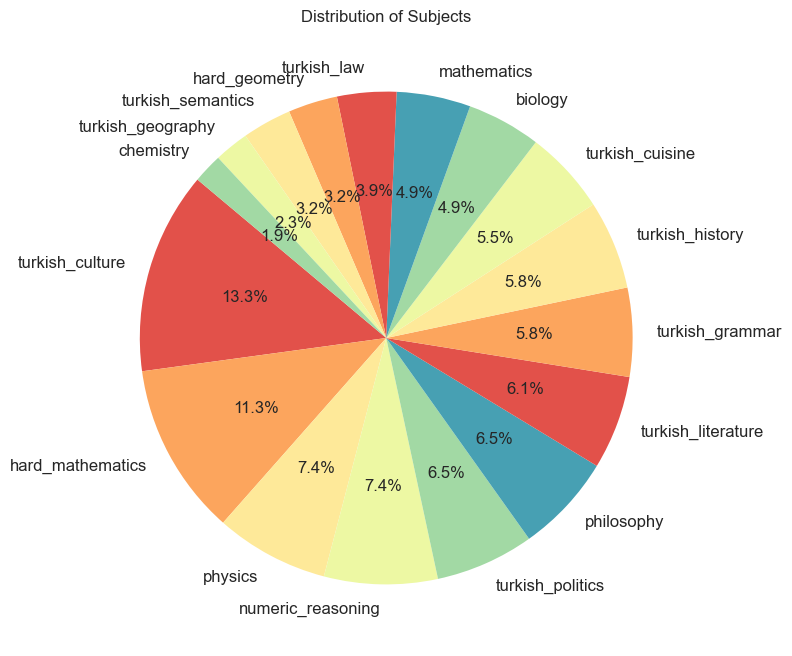

In [11]:
# Load the CSV data
file_path = 'questions.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Count the occurrences of each subject
subject_counts = data['Subject'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Spectral"),textprops={'fontsize': 12})
plt.title('Distribution of Subjects')
plt.savefig('distribution_6.png', dpi=300, bbox_inches='tight')
plt.show()